# Code Comparison to Online Material

This document compares the code to existing online material

+ Firstly to the code written in c (but converted to python) on  github https://github.com/djm2131/luscher_zeta


In [10]:
###### Comparing to Briceno
from zeta import *

In [4]:
d = np.array([0,0,0])

In [5]:
##import data from file if exists

folder_name = "d_" + str(d).replace(" ", "").replace("[", "").replace("]", "")
path = "roots_zeta/" + folder_name + "/data.npz"
data = np.load(path)

q_2 = data['q_2']
z_d_results = data['z_d_results']
roots = data['zeros']
asymototes = data['asymptotes']
q_2_plot = np.copy(q_2)
zeta_plot = np.copy(z_d_results)

nth_root = 0
x_0  = roots[nth_root]


In [6]:
import numpy as np
import scipy.special as sp
import scipy.integrate as integrate
import math

class CubatureData:
    def __init__(self, q2, ML, d, rtol):
        self.q2 = q2
        self.d = d
        self.gamma = np.sqrt( 1 + (d[0]**2 + d[1]**2 + d[2]**2)/(4.0 * q2 + (ML/np.pi)**2))
        self.ghat = [1.0, 1.0, 1.0]
        self.ghatinv = [1.0, 1.0, 1.0]
        self.rtol = rtol
        self.set_ghat()

    def set_ghat(self):
        for i in range(3):
            if self.d[i] != 0:
                self.ghat[i] = self.gamma
                self.ghatinv[i] = 1.0 / self.gamma

def Z00_1(data):
    Z00 = 0.0
    n = 0
    r = 1.0e+10
    while r > data.rtol:
        Z00_0 = Z00
        for nx in range(-n, n+1):
            for ny in range(-n, n+1):
                for nz in range(-n, n+1):
                    if -n < nx < n and -n < ny < n and -n < nz < n:
                        continue
                    r2mq2 = (data.ghatinv[0]*(nx-0.5*data.d[0]))**2 + \
                            (data.ghatinv[1]*(ny-0.5*data.d[1]))**2 + \
                            (data.ghatinv[2]*(nz-0.5*data.d[2]))**2 - data.q2
                    Z00 += np.exp(-r2mq2) / r2mq2
        r = abs(Z00 - Z00_0) / abs(0.5 * (Z00 + Z00_0))
        n += 1
    return Z00 / np.sqrt(4.0 * np.pi)

def Z00_2(data):
    q = np.sqrt(data.q2)
    return -np.pi * data.gamma * (np.exp(data.q2) - np.sqrt(np.pi) * np.real(q * sp.erfi(q)))

def Z00_3_integrand(s, data):
    II = 0.0
    n = 1
    r = 1.0e+10
    while r > data.rtol:
        II0 = II
        for nx in range(-n, n+1):
            for ny in range(-n, n+1):
                for nz in range(-n, n+1):
                    if -n < nx < n and -n < ny < n and -n < nz < n:
                        continue
                    II += (-1.0)**(nx*data.d[0] + ny*data.d[1] + nz*data.d[2]) * \
                          np.exp(-np.pi**2/s * (data.ghat[0]**2 * nx**2 + \
                                                data.ghat[1]**2 * ny**2 + \
                                                data.ghat[2]**2 * nz**2))
        r = abs(II - II0) / abs(0.5 * (II + II0))
        n += 1
    return (np.pi/s)**1.5 * np.exp(s*data.q2) * II

def Z00_3(data):
    result, error = integrate.quad(Z00_3_integrand, 0.0, 1.0, args=(data,))
    return data.gamma * result / np.sqrt(4.0 * np.pi)

def calculate_luscher_zeta(q2, ML, dx, dy, dz, rtol):
    d = [dx, dy, dz]
    data = CubatureData(q2, ML, d, rtol)
    Z00 = Z00_1(data) + Z00_2(data) + Z00_3(data)
    return Z00

# Example usage
q2 = roots[25]
ML = 1
dx = 0
dy = 0
dz = 0
rtol = 1e-8
result = calculate_luscher_zeta(q2, ML, dx, dy, dz, rtol)
print(f"Result: {result:.15e}")


Result: -9.394258260726929e-03


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_22455/1887846797.py:60: RuntimeWarning: invalid value encountered in scalar divide
  r = abs(II - II0) / abs(0.5 * (II + II0))


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_22455/1887846797.py:60: RuntimeWarning: invalid value encountered in scalar divide
  r = abs(II - II0) / abs(0.5 * (II + II0))


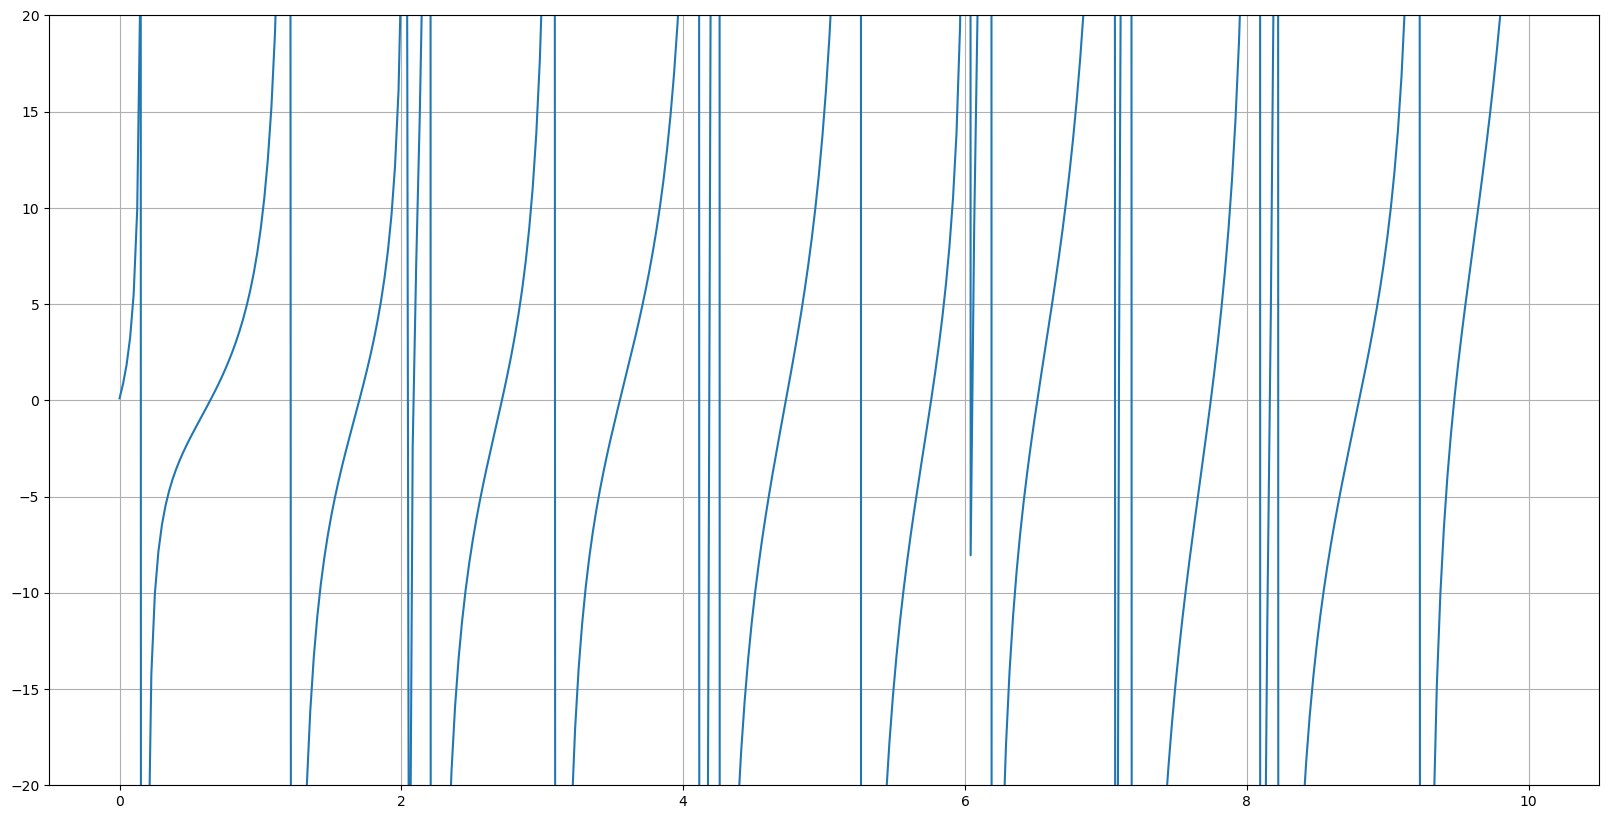

In [7]:
#calculate calculate Lüscher Zeta for range 0 to 20 q2 calculate_luscher_zeta(q2, gamma, dx, dy, dz, rtol)
q2 = np.linspace(0,10,400)
zeta_plot1 = []
for q_i in q2:
    zeta_plot1.append(calculate_luscher_zeta(q_i, 4, 1, 0, 0, 1e-8))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(q2, zeta_plot1)
plt.ylim(-20,20)
plt.grid()
plt.show()


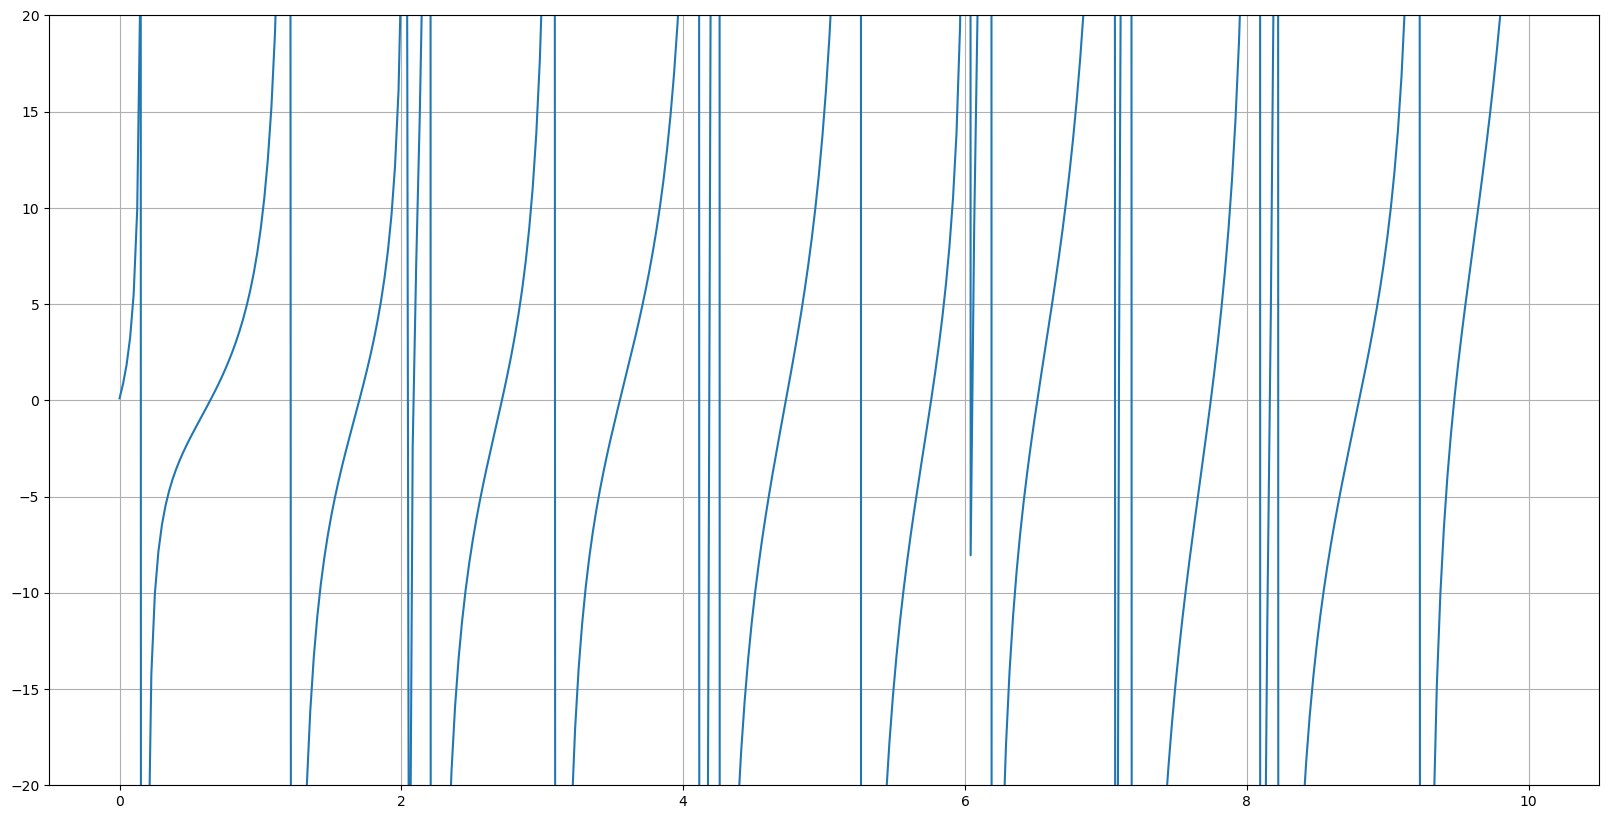

In [8]:
#do the same as above for zeta()
q = np.linspace(0,10,400)
zeta_plot = []
for q_i in q:
    zeta_plot.append(zeta(q_i, 1000, 0.1, np.array([1,0,0])))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(q, zeta_plot)
plt.ylim(-20,20)
plt.grid()
plt.show()

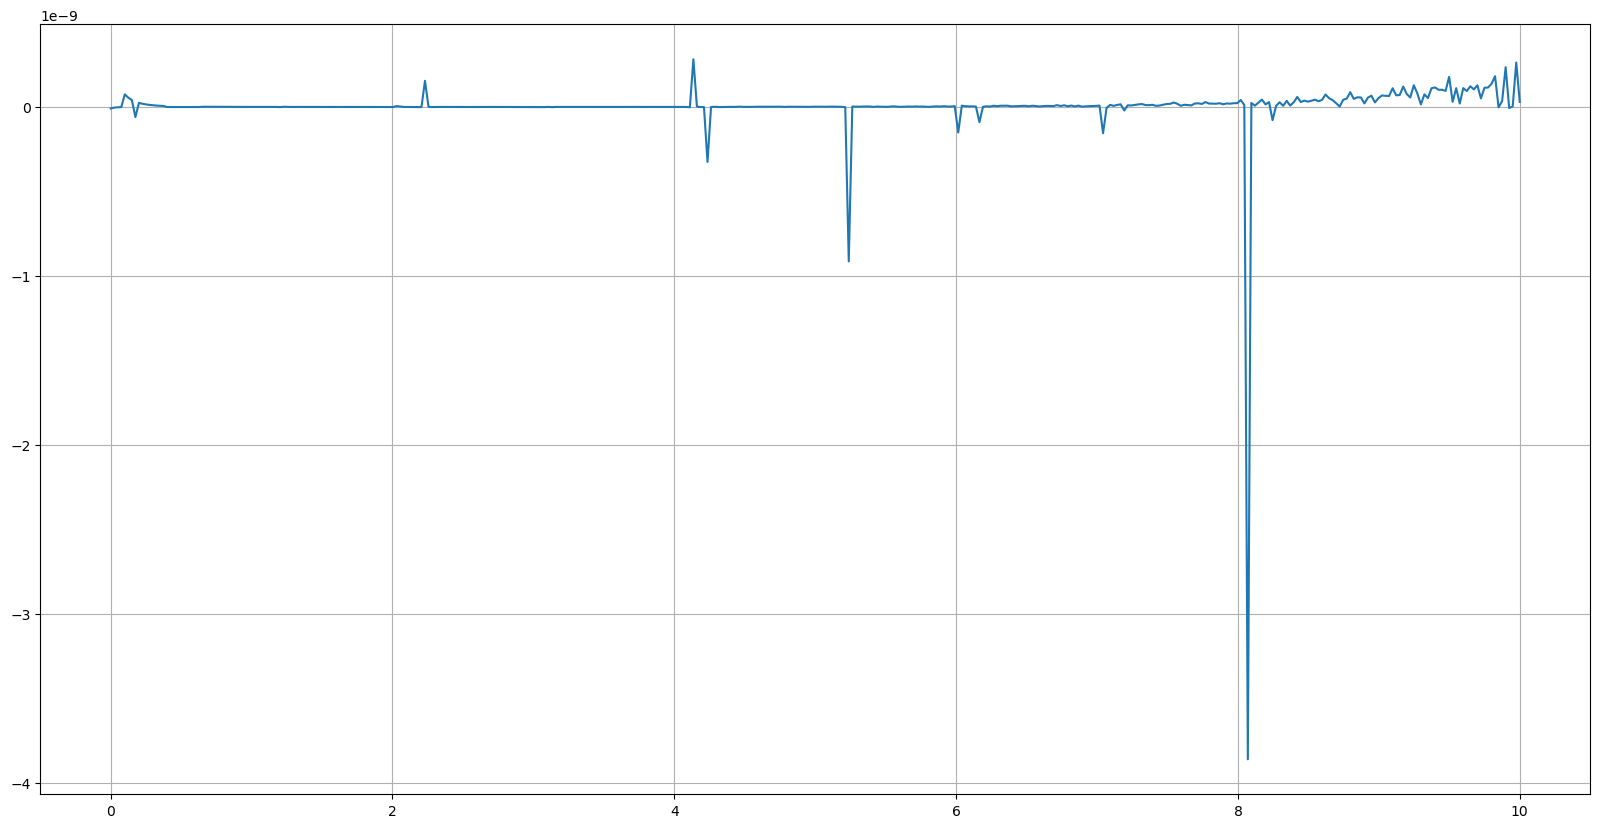

In [9]:
#in similar plots as above plot the difference between the two

plt.figure(figsize=(20,10))
plt.plot(q, np.array(zeta_plot)-np.array(zeta_plot1))

plt.grid()
plt.show()


## Agreement nearly perfect! 